# Plotting Exercise Part 2

## By Kian Bagherlee

### Wealth and Democracy

In [1]:
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

wdi = pd.read_csv(
    "https://raw.githubusercontent.com/nickeubank/"
    "practicaldatascience/master/Example_Data/world-small.csv"
)

wdi.head()

c:\Users\kbagh\miniconda3\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\kbagh\miniconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\kbagh\miniconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


,country,region,gdppcap08,polityIV
0,Albania,C&E Europe,7715,17.8
1,Algeria,Africa,8033,10.0
2,Angola,Africa,5899,8.0
3,Argentina,S. America,14333,18.0
4,Armenia,C&E Europe,6070,15.0


### Exercise 1

In [2]:
import statsmodels.formula.api as smf

results = smf.ols("polityIV ~ gdppcap08", data=wdi).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               polityIV   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     6.981
Date:                Wed, 25 Oct 2023   Prob (F-statistic):            0.00915
Time:                        11:51:51   Log-Likelihood:                -475.14
No. Observations:                 145   AIC:                             954.3
Df Residuals:                     143   BIC:                             960.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1354      0.721     16.841      0.0

### Exercise 2

Based off the results of the analysis above, it seems as if that gdppcap and polityIV barely have a relationship together, or at the very least the relationship is by conincidence. We should not put more interest in the relationship between the 2 from this point out.

### Exercise 3

c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


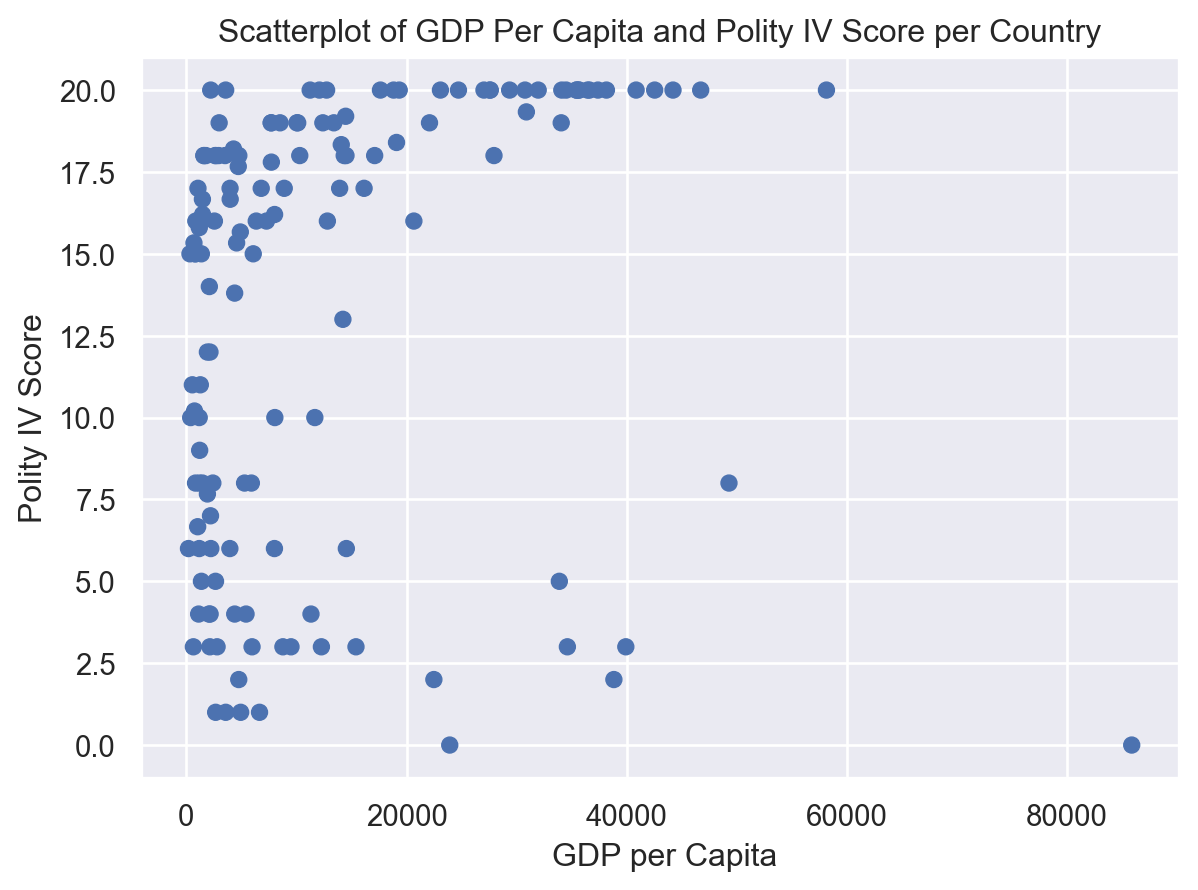

In [3]:
import seaborn.objects as so

so.Plot(
    wdi,
    x="gdppcap08",
    y="polityIV",
).add(so.Dot()).label(
    x=" GDP per Capita",
    y="Polity IV Score",
    title="Scatterplot of GDP Per Capita and Polity IV Score per Country",
)

### Exercise 4

c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


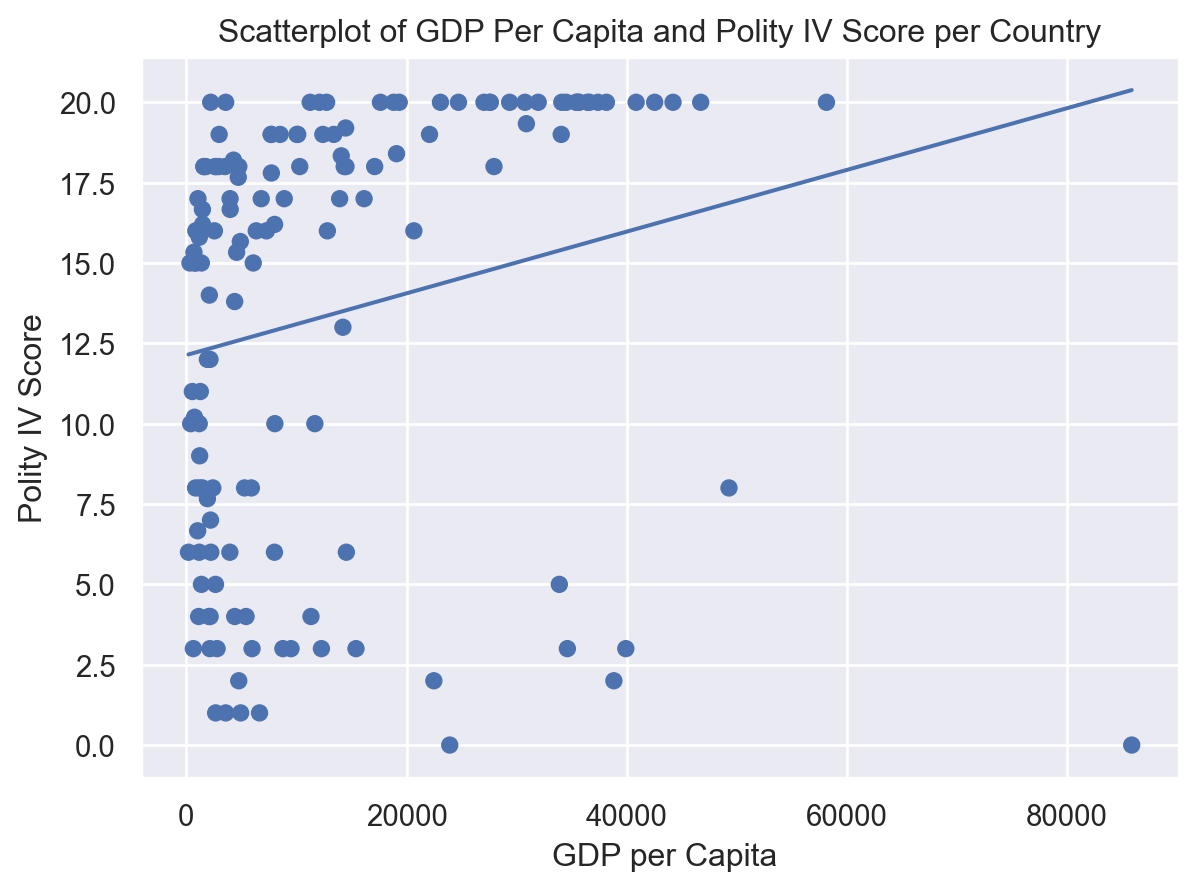

In [4]:
so.Plot(
    wdi,
    x="gdppcap08",
    y="polityIV",
).add(
    so.Dot()
).add(so.Line(), so.PolyFit(order=1)).label(
    x=" GDP per Capita",
    y="Polity IV Score",
    title="Scatterplot of GDP Per Capita and Polity IV Score per Country",
)

### Exercise 5

From the graph above, with a linear regression line fitted, it is clear that a linear model does not fit the data well at all. There must be some transformation to occur, or other data should be analyzed.

### Exercise 6

The transformation I will try to implement is a log transformation on GDP, in attempt to make the line more linear.

c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


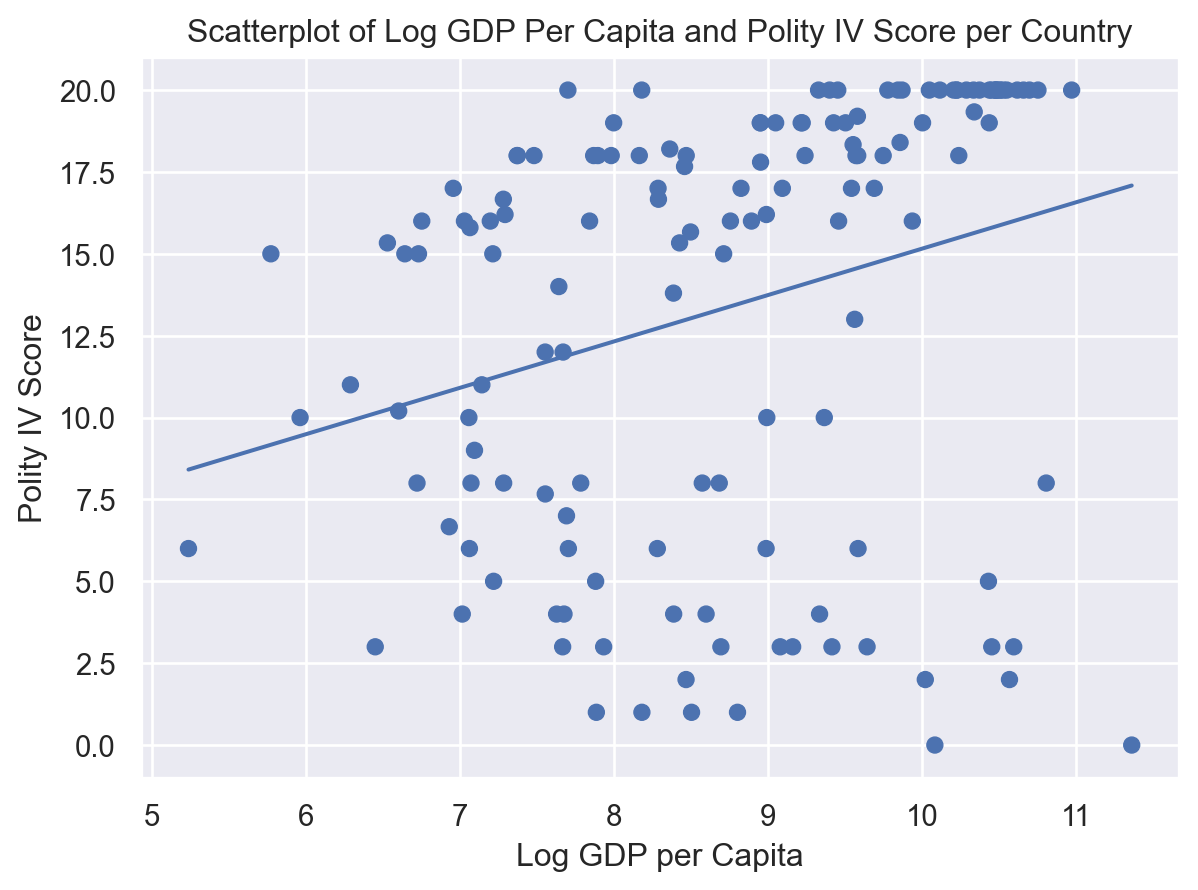

In [5]:
wdi["log_gdp"] = np.log(wdi["gdppcap08"])
so.Plot(
    wdi,
    x="log_gdp",
    y="polityIV",
).add(
    so.Dot()
).add(so.Line(), so.PolyFit(order=1)).label(
    x="Log GDP per Capita",
    y="Polity IV Score",
    title="Scatterplot of Log GDP Per Capita and Polity IV Score per Country",
)

### Exercise 7

In [6]:
print("The following below is a re-fitting of our model")

results = smf.ols("polityIV ~ log_gdp", data=wdi).fit()
print(results.summary())

The following below is a re-fitting of our model
                            OLS Regression Results                            
Dep. Variable:               polityIV   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     12.95
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           0.000441
Time:                        11:51:55   Log-Likelihood:                -472.31
No. Observations:                 145   AIC:                             948.6
Df Residuals:                     143   BIC:                             954.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Int

c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

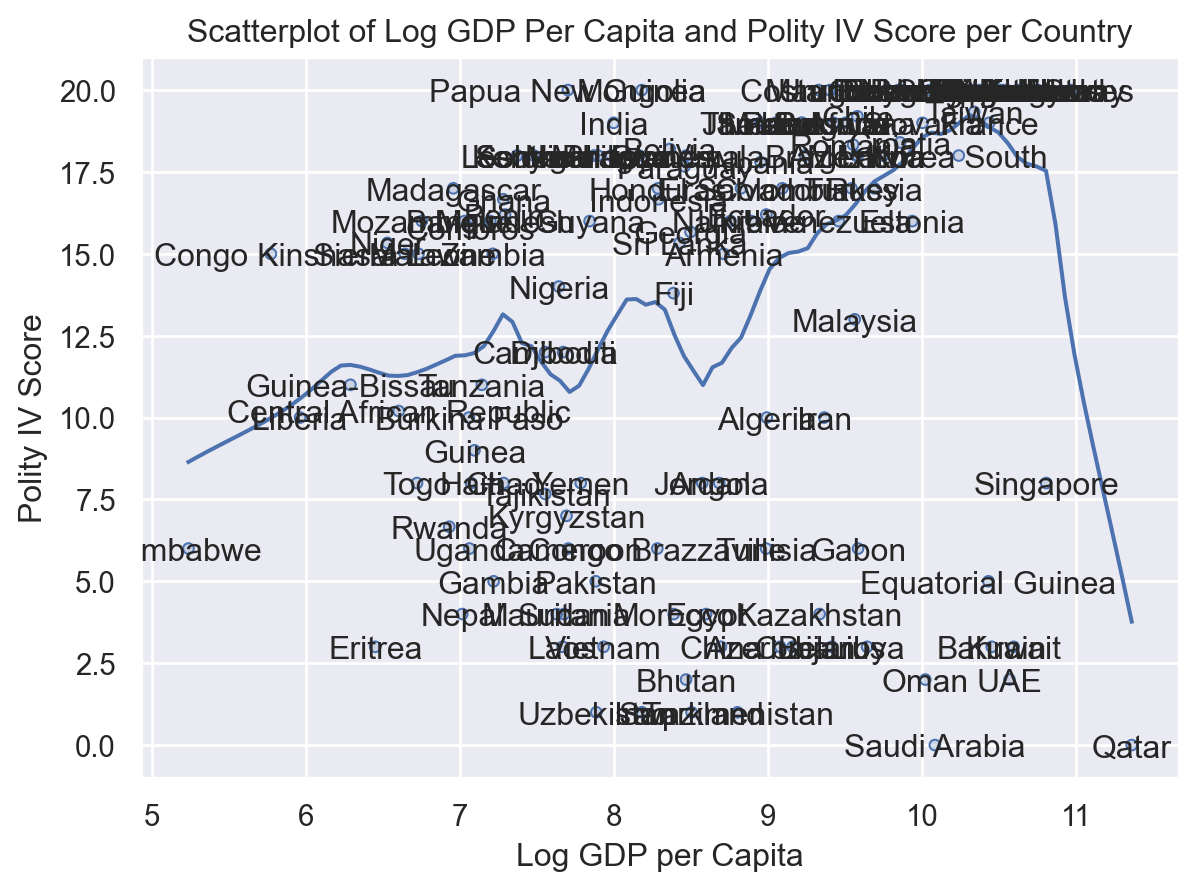

In [7]:
from dataclasses import dataclass
from seaborn._stats.base import Stat
import statsmodels.api as sm


@dataclass
class Lowess(Stat):
    """
    Fit a locally-weighted regression to smooth the data.
    """

    frac: float = 0.2  # Fraction of data to use when estimating each y-value
    gridsize: int = 100  # How fine-grained to plot the curve. Increase if jagged.

    def _fit_predict(self, data):
        x = data["x"]
        xx = np.linspace(x.min(), x.max(), self.gridsize)
        # https://www.statsmodels.org/devel/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html
        yy = sm.nonparametric.lowess(exog=x, endog=data["y"], xvals=xx, frac=self.frac)
        return pd.DataFrame(dict(x=xx, y=yy))

    def __call__(self, data, groupby, orient, scales):
        return groupby.apply(data.dropna(subset=["x", "y"]), self._fit_predict)


(
    so.Plot(
        wdi,
        x="log_gdp",
        y="polityIV",
    )
    .add(so.Dots())
    .add(so.Lines(), Lowess())
    .add(so.Text(), text="country")
    .label(
        x="Log GDP per Capita",
        y="Polity IV Score",
        title="Scatterplot of Log GDP Per Capita and Polity IV Score per Country",
    )
)

### Exercise 8

c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

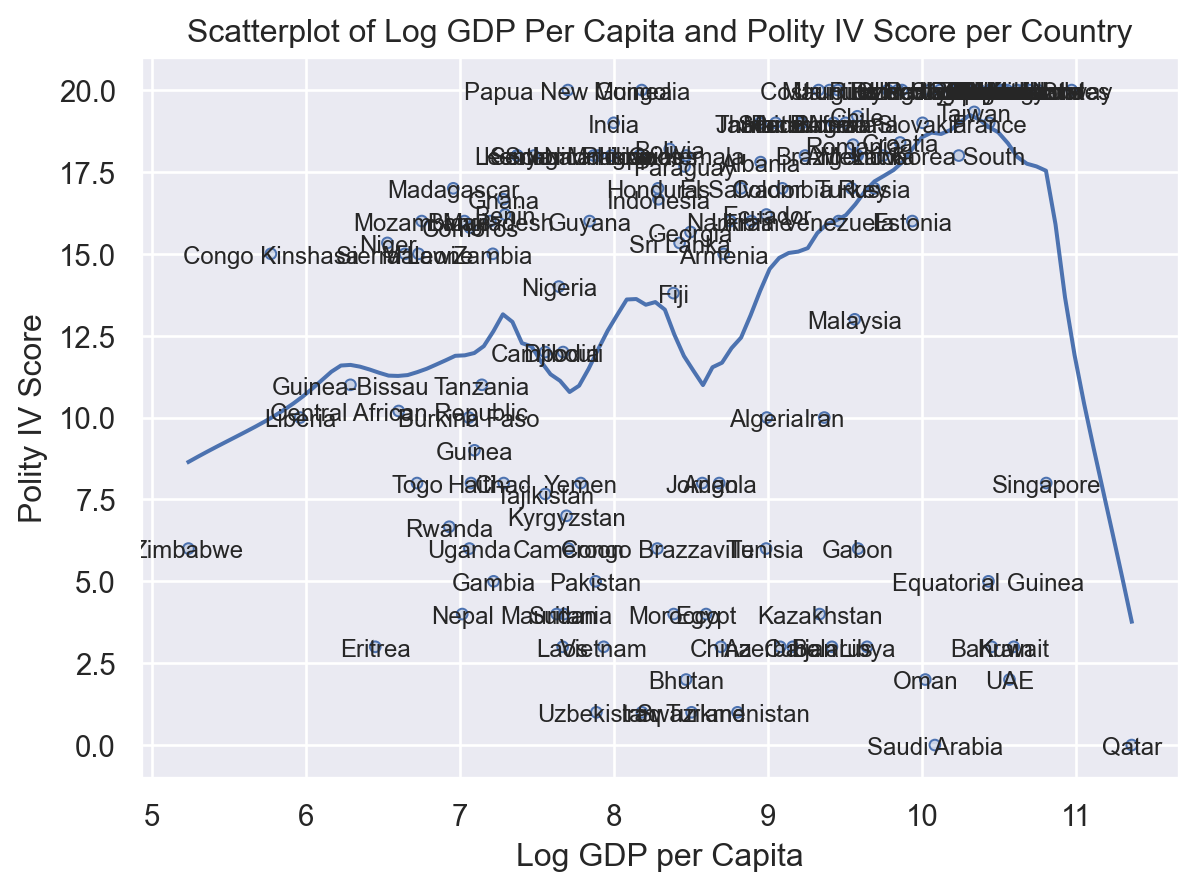

In [8]:
(
    so.Plot(
        wdi,
        x="log_gdp",
        y="polityIV",
    )
    .add(so.Dots())
    .add(so.Lines(), Lowess())
    .add(so.Text(fontsize=9), text="country")
    .label(
        x="Log GDP per Capita",
        y="Polity IV Score",
        title="Scatterplot of Log GDP Per Capita and Polity IV Score per Country",
    )
)

The outlier country on the bottom right is Qatar, with a very low democratic score, but an incredibly high Log GDP.

### Exercise 9

In [9]:
no_me = wdi[
    ~wdi["country"].isin(
        [
            "Qatar",
            "Kuwait",
            "Equatorial Guinea",
            "UAE",
            "Norway",
            "Saudi Arabia",
            "Libya",
            "Oman",
            "Gabon",
            "Angola",
        ]
    )
]
no_me

,country,region,gdppcap08,polityIV,log_gdp
0,Albania,C&E Europe,7715,17.8,8.950922
1,Algeria,Africa,8033,10.0,8.991313
3,Argentina,S. America,14333,18.0,9.570320
4,Armenia,C&E Europe,6070,15.0,8.711114
5,Australia,Asia-Pacific,35677,20.0,10.482262
...,...,...,...,...,...
140,Venezuela,S. America,12804,16.0,9.457513
141,Vietnam,Asia-Pacific,2785,3.0,7.932003
142,Yemen,Middle East,2400,8.0,7.783224
143,Zambia,Africa,1356,15.0,7.212294


The following below is the graph of Log GDP and Polity score for non-natural resource producers


c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

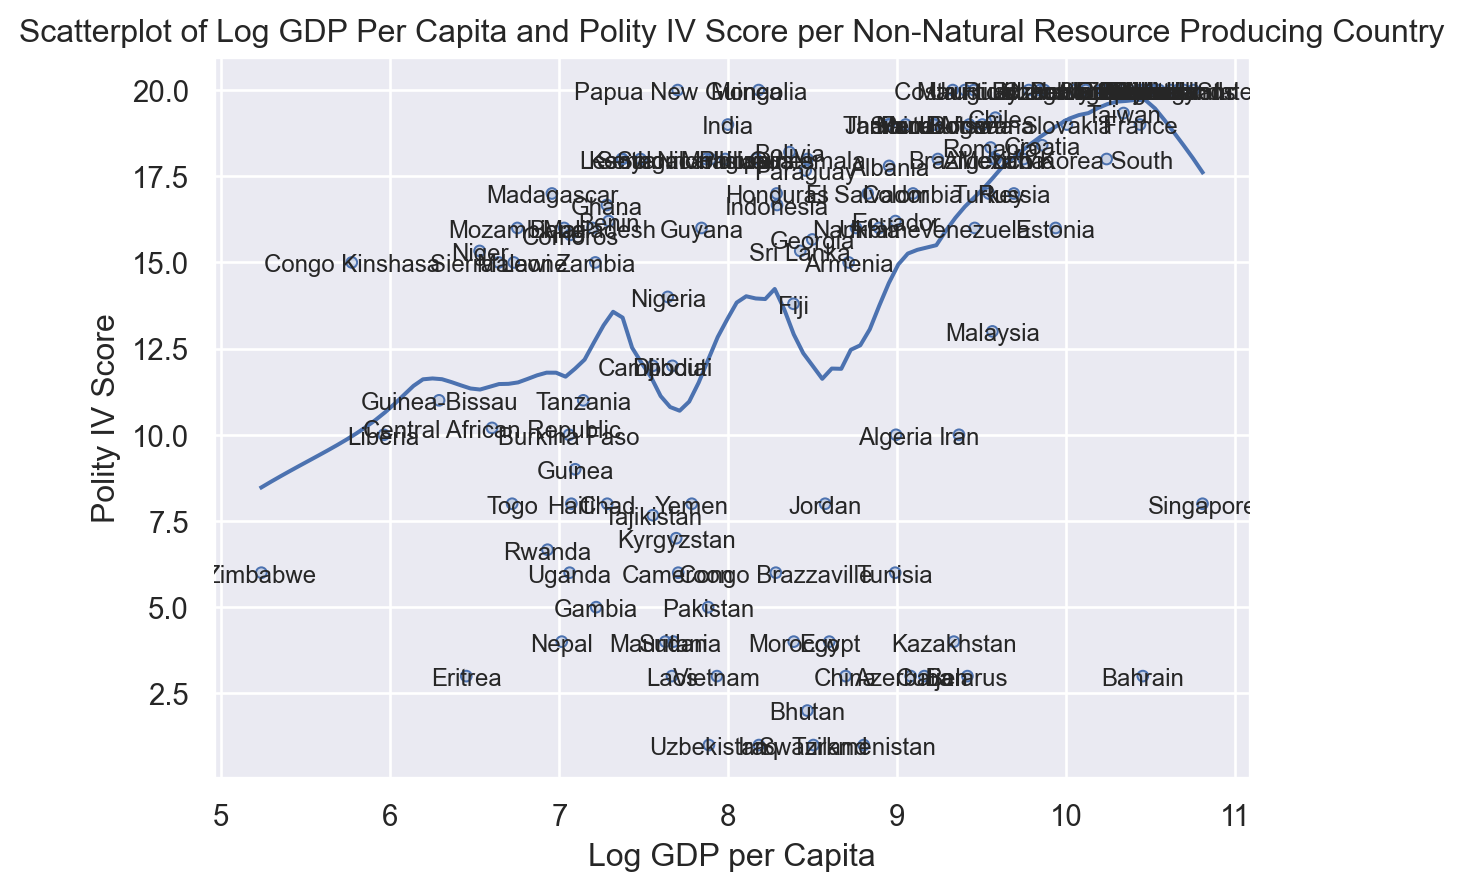

In [10]:
print(
    "The following below is the graph of Log GDP and Polity score for non-natural resource producers"
)

(
    so.Plot(
        no_me,
        x="log_gdp",
        y="polityIV",
    )
    .add(so.Dots())
    .add(so.Lines(), Lowess())
    .add(so.Text(fontsize=9), text="country")
    .label(
        x="Log GDP per Capita",
        y="Polity IV Score",
        title="Scatterplot of Log GDP Per Capita and Polity IV Score per Non-Natural Resource Producing Country",
    )
)

It seems from the graph above, with some outliers, that non-natural resource producers have a positive relationship between GDP per Capita and Polity score.

### Exercise 10

In [11]:
print(
    f"We succesffully took out {len(wdi)-len(no_me)} countries when made that previous graph."
)

We succesffully took out 10 countries when made that previous graph.


### Exercise 11

In [12]:
me = wdi[
    wdi["country"].isin(
        [
            "Qatar",
            "Kuwait",
            "Equatorial Guinea",
            "UAE",
            "Norway",
            "Saudi Arabia",
            "Libya",
            "Oman",
            "Gabon",
            "Angola",
        ]
    )
]
me

,country,region,gdppcap08,polityIV,log_gdp
2,Angola,Africa,5899,8.0,8.682538
39,Equatorial Guinea,Africa,33873,5.0,10.430374
45,Gabon,Africa,14527,6.0,9.583764
71,Kuwait,Middle East,39914,3.0,10.594482
77,Libya,Middle East,15402,3.0,9.642253
98,Norway,Scandinavia,58138,20.0,10.970575
99,Oman,Middle East,22478,2.0,10.020292
107,Qatar,Middle East,85868,0.0,11.360567
111,Saudi Arabia,Middle East,23920,0.0,10.082470
133,UAE,Middle East,38830,2.0,10.566948


The following below is the graph of Log GDP and Polity score for non-natural resource producers


c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

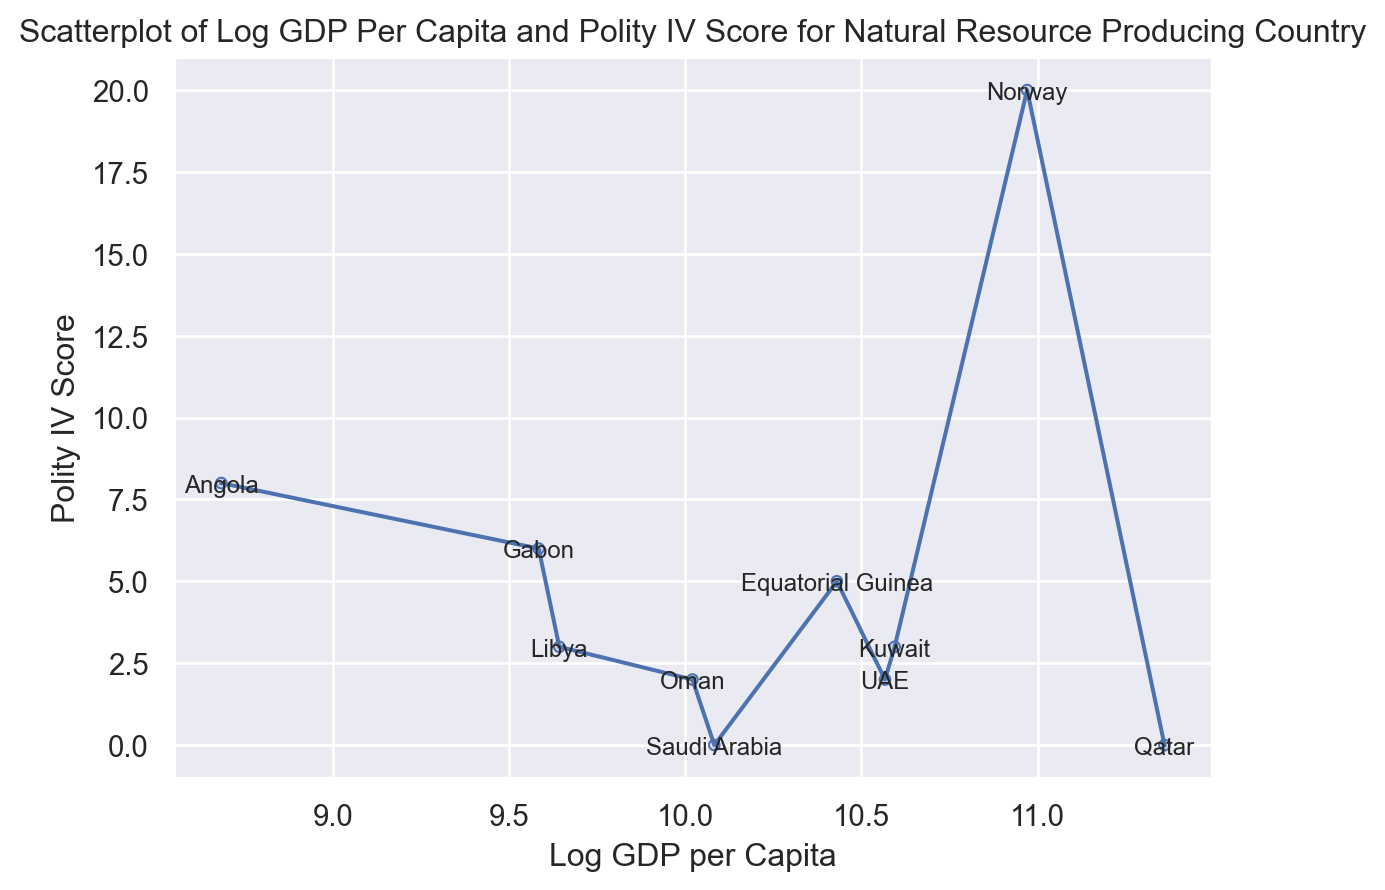

In [16]:
print(
    "The following below is the graph of Log GDP and Polity score for non-natural resource producers"
)

(
    so.Plot(
        me,
        x="log_gdp",
        y="polityIV",
    )
    .add(so.Dots())
    .add(so.Lines())
    .add(so.Text(fontsize=9), text="country")
    .label(
        x="Log GDP per Capita",
        y="Polity IV Score",
        title="Scatterplot of Log GDP Per Capita and Polity IV Score for Natural Resource Producing Country",
    )
)

With the exception of Norway, who seems to be a very painful outlier, these countries seems to have a negative correlation between their GDP and their Polity. A simple conclusion is that the more an oil producing country profits off of its oil, the worse the polity score.

### Exercise 12

I do recognize that my claim of a lack of linear relationship was wrong. I do not believe that linear model anymore, as we had done enough data cleaning with our information to recognize huge outliers and a distinct difference between two sets of countries. By recognizing this change, and making the proper division, it is clear that there is a linear relationship, but a postiive or negative correlation changes on what country classification we are analyzing.

From plotting, we were able to recognize massive outliers that were disrupting potential linear relationship. As well, we were able to use plotting to check our results and come up with conclusions. Overall, it seems that using plotting for investigation purposes is incredibly beneficial.

### Exercise 13

In [22]:
resource = [
    "Qatar",
    "Kuwait",
    "Equatorial Guinea",
    "UAE",
    "Norway",
    "Saudi Arabia",
    "Libya",
    "Oman",
    "Gabon",
    "Angola",
]

print(
    "First, we want to add a classification of whether they are a natural resource country or not"
)
wdi["resource"] = wdi["country"].apply(lambda x: "Yes" if x in resource else "No")
wdi

First, we want to add a classification of whether they are a natural resource country or not


,country,region,gdppcap08,polityIV,log_gdp,resource
0,Albania,C&E Europe,7715,17.8,8.950922,No
1,Algeria,Africa,8033,10.0,8.991313,No
2,Angola,Africa,5899,8.0,8.682538,Yes
3,Argentina,S. America,14333,18.0,9.570320,No
4,Armenia,C&E Europe,6070,15.0,8.711114,No
...,...,...,...,...,...,...
140,Venezuela,S. America,12804,16.0,9.457513,No
141,Vietnam,Asia-Pacific,2785,3.0,7.932003,No
142,Yemen,Middle East,2400,8.0,7.783224,No
143,Zambia,Africa,1356,15.0,7.212294,No


c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

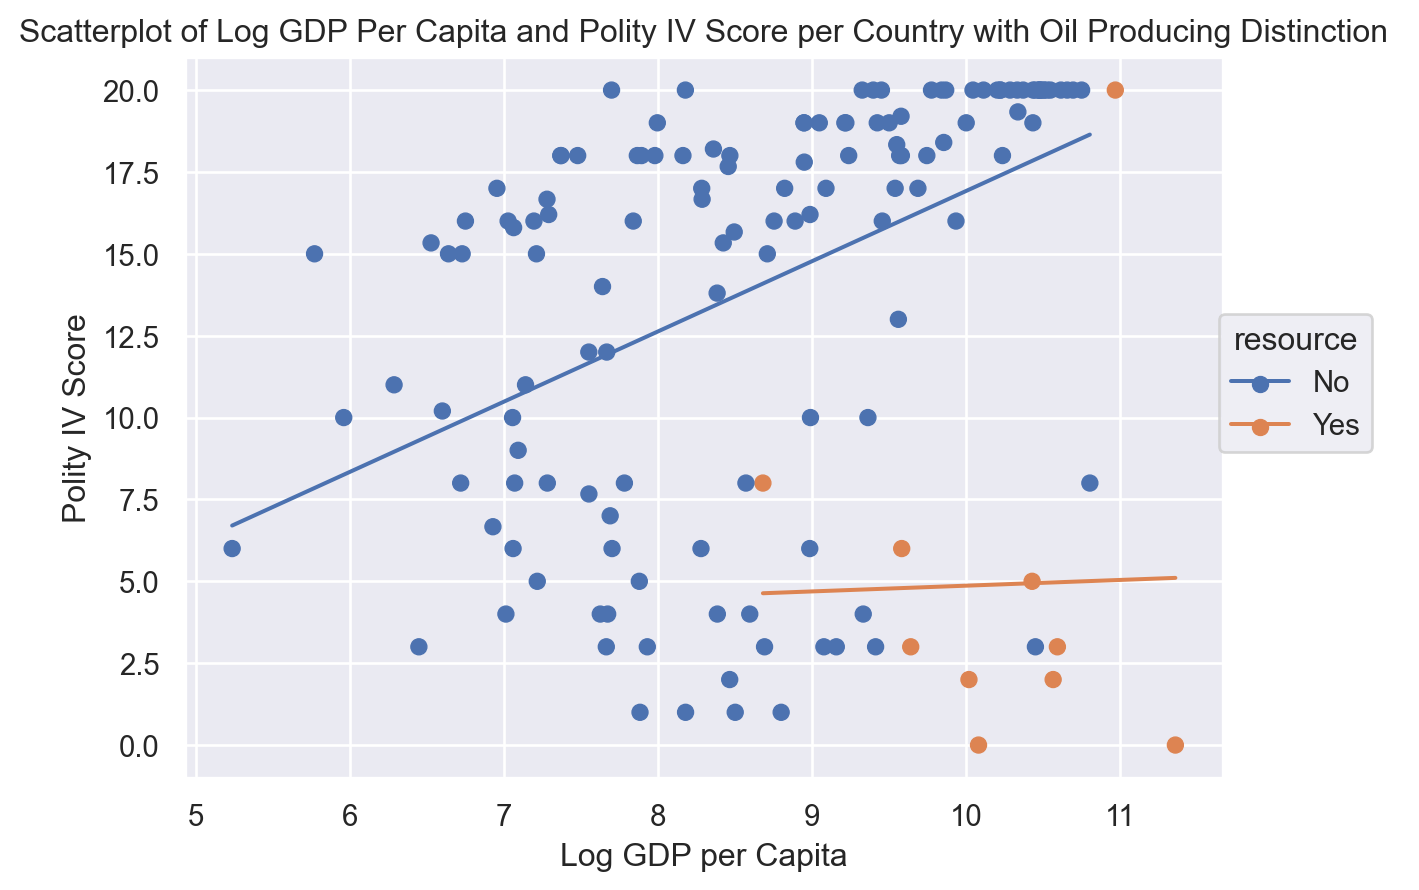

In [53]:
so.Plot(wdi, x="log_gdp", y="polityIV", color="resource").add(so.Dot()).add(
    so.Line(), so.PolyFit(order=1)
).label(
    x="Log GDP per Capita",
    y="Polity IV Score",
    title="Scatterplot of Log GDP Per Capita and Polity IV Score per Country with Oil Producing Distinction",
)

### Exercise 14

In [54]:
from matplotlib import style
import matplotlib.pyplot as plt
import warnings

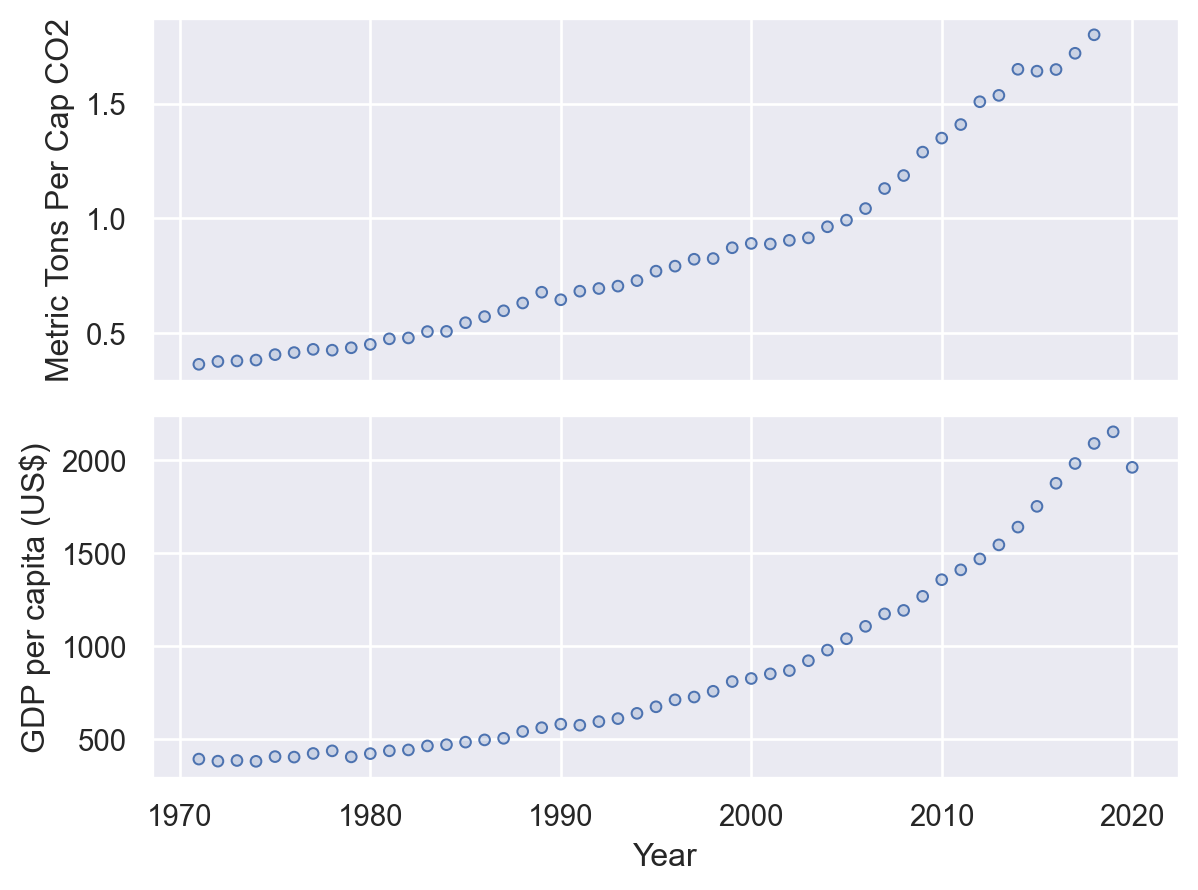

In [55]:
warnings.simplefilter(action="ignore", category=FutureWarning)

wdi = pd.read_csv(
    "https://raw.githubusercontent.com/nickeubank/"
    "practicaldatascience/master/Example_Data/wdi_plotting.csv"
)

india = wdi[wdi["Country Name"] == "India"]

india = india.rename(
    columns={
        "CO2 emissions (metric tons per capita)": "Metric Tons Per Cap CO2",
        "GDP per capita (constant 2010 US$)": "GDP per capita (US$)",
    }
)
p = (
    so.Plot(
        india,
        x="Year",
    )
    .add(so.Dots())
    .pair(
        y=[
            "Metric Tons Per Cap CO2",
            "GDP per capita (US$)",
        ]
    )
)
p

In [58]:
wdi

,Year,Country Name,Country Code,GDP per capita (constant 2010 US$),"Population, total",CO2 emissions (metric tons per capita),"Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)","PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)","Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)","Literacy rate, youth female (% of females ages 15-24)"
0,1971,Afghanistan,AFG,NaN,11475450.0,0.165208,NaN,NaN,37.930,294.8,NaN
1,1971,Albania,ALB,NaN,2187853.0,1.989498,NaN,NaN,67.237,NaN,NaN
2,1971,Algeria,DZA,2335.784627,14872253.0,1.255270,NaN,NaN,50.773,235.2,NaN
3,1971,American Samoa,ASM,NaN,27982.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1971,Andorra,AND,41430.346930,25571.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10845,2020,Virgin Islands (U.S.),VIR,NaN,106290.0,NaN,NaN,NaN,NaN,NaN,NaN
10846,2020,West Bank and Gaza,PSE,2549.044494,4803269.0,NaN,NaN,NaN,NaN,NaN,NaN
10847,2020,"Yemen, Rep.",YEM,NaN,29825968.0,NaN,NaN,NaN,NaN,NaN,NaN
10848,2020,Zambia,ZMB,1558.323007,18383956.0,NaN,NaN,NaN,NaN,NaN,NaN


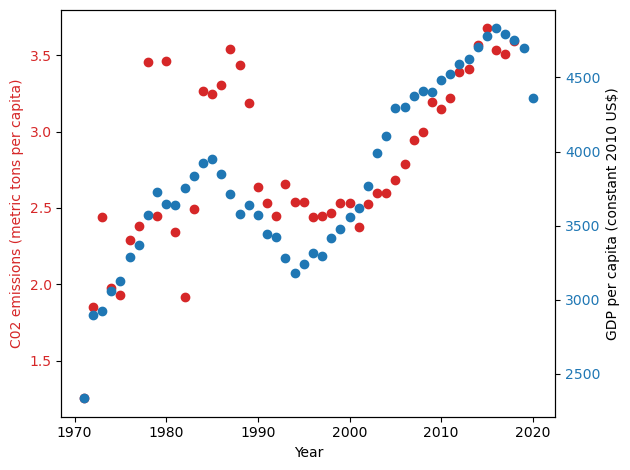

In [64]:
alg = wdi[wdi["Country Name"] == "Algeria"]

alg = alg.rename(
    columns={
        "CO2 emissions (metric tons per capita)": "Metric Tons Per Cap CO2",
        "GDP per capita (constant 2010 US$)": "GDP per capita (US$)",
    }
)

fig, ax = plt.subplots()

color = "tab:red"
ax.set_xlabel("Year")
ax.set_ylabel("C02 emissions (metric tons per capita)", color=color)
ax.scatter(alg["Year"], alg["Metric Tons Per Cap CO2"], color=color)
ax.tick_params(axis="y", labelcolor=color)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = "tab:blue"
ax2.set_ylabel(
    "GDP per capita (constant 2010 US$)"
)  # we already handled the x-label with ax1
ax2.scatter(alg["Year"], alg["GDP per capita (US$)"], color=color)
ax2.tick_params(axis="y", labelcolor=color)

fig.tight_layout()
plt.show()